<a href="https://colab.research.google.com/github/YousraAshour/machine_learning/blob/main/K_Means_Clustering_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
from sklearn.metrics import r2_score , mean_squared_error
from scipy.spatial.distance import cdist 
from sklearn import preprocessing
from sklearn.datasets import load_iris


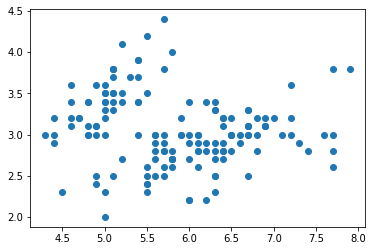

In [ ]:
# data=pd.read_csv(r'/MultipleLR.csv - MultipleLR.csv.csv',header=None)
# data=np.asarray(data)
x,y=load_iris(return_X_y=True)
x=x[:,:2].reshape(-1,2)
plt.scatter(x[:,0],x[:,1])

In [ ]:
# if np.isnan(distances).any() :
#       # print('distshape',distances.shape)
#       print('distances na') 



In [ ]:
# Choose K and Randomly initialize Centriods

def KMeans(x,k,iters):
  # x= preprocessing.normalize(x)
  rand_idx = np.random.choice(x.shape[0], k, replace=False)
  # print('idx', rand_idx)
  centroids = x[rand_idx, :]
  # print('cen', centroids)
  loss=[]
  
  iter=0
  for i in range(iters):
    
    distances = cdist(x, centroids ,'euclidean')
    if np.isnan(distances).any() :
      # print('distshape',distances.shape)
      # print('distances na') 
      break

    k_idx = np.array([np.argmin(i) for i in distances])
    # print('kidx',k_idx)
    # k_idx=np.argmin(distances, axis=1)
    if np.isnan(k_idx).any() :
      print('na k_idx')

    diff= 0
    for a in range(k):
      d= x[k_idx==a] - centroids[a]
      diff = diff + np.sum(d**2)
      if np.isnan(d).any():
        print('na d')

    dist_fun = (1/x.shape[0]* diff)
    loss.append(dist_fun)
    if np.isnan(dist_fun).any():
        print('na dist_fun')


    new_centers=np.empty([k,x.shape[1]])
    for j in range(k):
          if np.isnan(x[k_idx == j]).any() :
            new_centers=centroids
            continue
          new_centers[j] = np.mean(x[k_idx == j],axis = 0)

    iter+=1
    
    # if np.any(new_centers-centroids) < 0.001:
    if np.count_nonzero(np.array(centroids)-np.array(new_centers)) == 0:
      break
    centroids=new_centers

  plt.scatter(x[:,0],x[:,1],c=k_idx, s=40)

  # print('iters', iter)
  return centroids, dist_fun, loss, k_idx


# Optimization and choosing the best Centriods 
# def best_centroid():

#   for i in range (100):




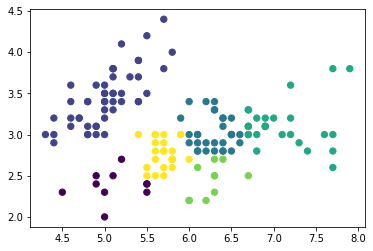

In [ ]:
centroids, dist_fun, loss, k_idx=KMeans(x,6,300)


In [ ]:
# plotting for different K
def Optimum_centroids(x,K,iters=300,r=100):

  centroids=[]
  distortion=[]
  k=[]
  for i in range(10):
    cen,dist, losses,k_idx = KMeans(x,K,300)
    # print(dist.shape)
    centroids.append(cen)
    distortion.append(dist)
    k.append(k_idx)
  k=np.array(k)
  centroids=np.array(centroids)
  

  # print('cen', centroids, '\n','dist',distortion)
  best_dist= np.min(distortion)
  # print(best_dist)
  best_centroid= centroids[distortion.index(best_dist)]
  # print(best_centroid)
  # print('best cen', besdistortion.index(best_dist)t_centroid, '\n best dist', best_centroid)
  kidx= k_idx[distortion.index(best_dist)]
  plt.scatter(x[:,0],x[:,1],c=k_idx, s=40)
  plt.scatter(best_centroid[:,0],best_centroid[:,1], color='red')

  return best_centroid, best_dist




/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


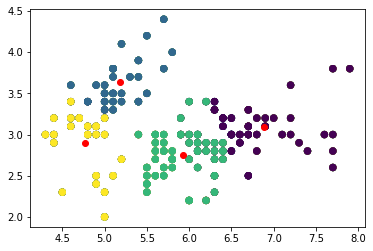

In [ ]:
cen, dist=Optimum_centroids(x,4,300,100)
# print(cen,dist)
# if np.isnan(cen).any() :
#       print('cen na')

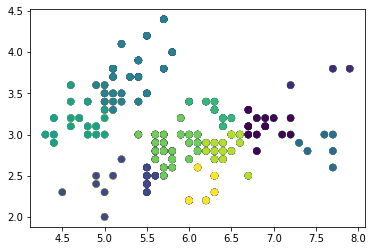

In [ ]:
cens=[]
dists=[]
for i in range (1,11):
    cen, dist,loss, k_idx= KMeans(x,i,300)
    cens.append(cen)
    dists.append(dist)



  

[0.8698351111111113,
 0.3896506164058796,
 0.24724180164819554,
 0.19340050256257157,
 0.16154553215225484,
 0.12353592263945211,
 0.10326260410637013,
 0.10250733758415648,
 0.08307805089647195,
 0.07387956103602657]

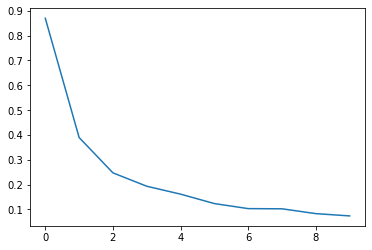

In [ ]:
plt.plot(dists,,,)
dists

In [ ]:
rand_idx = np.random.choice(x.shape[0], 4, replace=False)
centroids = x[rand_idx, :]
loss=[]
  
iter=0
for i in range(100):
    
    distances = cdist(x, centroids ,'euclidean')
    print(distances)
    # print(distances.shape)
     
    # k_idx = np.array([np.argmin(i) for i in distance])
    k_idx=np.argmin(distances, axis=1)
    
diff= 0
for a in range(2):
    d= x[k_idx==a] - centroids[a]
    diff = diff + np.sum(d**2)

dist_fun = 1/x.shape[0]* diff
loss.append(dist_fun)

if dist_fun == np.nan :
    print('dist',dist_fun)
    print('dist',distances)

# new_centers=np.empty([k,x.shape[1]])
# for l in range(10):
#   for j in range(2):
#     new_centers[j] = np.mean(x[k_idx == j], axis = 0)
#     iter+=1
#     print('new', new_centers)

Streaming output truncated to the last 5000 lines.
 [0.         0.50990195 0.36055513 0.36055513]
 [0.78102497 0.60827625 0.42426407 0.76157731]
 [0.85440037 0.72801099 1.         0.6       ]
 [0.4        0.14142136 0.2236068  0.2236068 ]
 [0.36055513 0.2236068  0.4        0.        ]
 [1.33416641 1.21655251 1.5        1.1       ]
 [1.61245155 1.52970585 1.3        1.67630546]
 [1.07703296 0.90553851 1.20415946 0.80622577]
 [0.89442719 0.42426407 0.78102497 0.53851648]
 [0.9486833  1.13137085 1.25299641 0.92195445]
 [0.2236068  0.41231056 0.4472136  0.2       ]
 [0.60827625 0.1        0.42426407 0.31622777]
 [0.58309519 0.4472136  0.7        0.3       ]
 [1.         0.76157731 0.64031242 0.94339811]
 [0.70710678 0.6        0.36055513 0.72801099]
 [0.14142136 0.4        0.36055513 0.2236068 ]
 [0.36055513 0.2236068  0.4        0.        ]
 [1.48660687 1.64012195 1.78885438 1.44222051]
 [1.56524758 1.31529464 1.64924225 1.26491106]
 [1.14017543 0.72111026 0.80622577 0.94339811]
 [0.60827